In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm

In [ ]:
# Generate the data of our experiment

def data_gen_process():
   beta1 = 2
   beta2_values = np.linspace(0, 0.16, 9)
   M = [150, 200, 500, 1000, 2000]
   n_train = 150
   n_test = 2000
   seed = 42


   epsilon = np.random.normal(0, 1, n_train + n_test)
   x = np.random.uniform(0, 5, n_train + n_test)

   x_train = x[:n_train]
   x_test = x[n_train:n_train+n_test]
   epsilon_train = epsilon[:n_train]
   epsilon_test = epsilon[n_train:n_train+n_test]

   liste_y = []
   liste_y_train = []
   liste_y_test = []

   for beta2 in beta2_values:
    y = beta1*x + beta2*x**2 + epsilon
    y_train = beta1*x_train + beta2*x_train**2 + epsilon_train
    y_test = beta1*x_test + beta2*x_test**2 + epsilon_test

    liste_y.append(y)
    liste_y_train.append(y_train)
    liste_y_test.append(y_test)

   return (beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)


(beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)  = data_gen_process()

In [ ]:
# Generate one's personal data

def generate_normal_data(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

def generate_exponential_data(scale, size):
    return np.random.exponential(scale, size)

def generate_binomial_data(n, p, size):
    return np.random.binomial(n, p, size)

def generate_uniform_data(n, p, size):
    return np.random.uniform(n, p, size)

def generate_data():
    print("Choisissez la distribution que vous souhaitez utiliser pour générer des données :")
    print("1. Normale")
    print("2. Exponentielle")
    print("3. Binomiale")
    print("4. Uniforme")

    choice = int(input("Entrez le numéro correspondant à votre choix : "))
    size = int(input("Entrez le nombre de données à générer : "))

    if choice == 1:
        mean = float(input("Entrez la moyenne : "))
        std_dev = float(input("Entrez l'écart-type : "))
        data = generate_normal_data(mean, std_dev, size)
    elif choice == 2:
        scale = float(input("Entrez le paramètre d'échelle (lambda) : "))
        data = generate_exponential_data(scale, size)
    elif choice == 3:
        n = int(input("Entrez le nombre d'essais : "))
        p = float(input("Entrez la probabilité de succès : "))
        data = generate_binomial_data(n, p, size)
    elif choice == 4:
        n = int(input("Entrez la borne gauche : "))
        p = float(input("Entrez la borne droite : "))
        data = generate_uniform_data(n, p, size)
    else:
        print("Choix invalide.")
        return None

    return data


def get_user_input():
    print("Génération des données pour X")
    x = generate_data()
    if x is None:
        return None, None, None, None
    print("Génération des données pour Epsilon")
    epsilon = generate_data()
    if epsilon is None:
        return None, None, None, None

    print("Rentrer des valeurs réelles pour les paramètres")
    expression = input("Entrez l'expression pour calculer y en fonction de x et epsilon (ex: 'beta1 * x + beta2 * x**2 + epsilon'): ")
    params = {}

    param_names = [param for param in expression.split() if param.isalpha() and param not in ['x', 'epsilon']]
    for param in param_names:
        params[param] = float(input(f"Entrez la valeur de {param}: "))

    return expression, x, epsilon, params


def calculate_y(expression, x, epsilon, **params):
    if len(x) != len(epsilon):
        raise ValueError("Les vecteurs x et epsilon doivent avoir la même taille.")

    local_vars = {'x': x, 'epsilon': epsilon}
    local_vars.update(params)

    y = eval(expression, {}, local_vars)

    return y

def your_data():
    expression, x, epsilon, params = get_user_input()
    if expression is not None and x is not None and epsilon is not None:
        y = calculate_y(expression, x, epsilon, **params)
        plt.figure()
        plt.title("Affichage de Y en fonction de X")
        plt.plot(x[np.argsort(x)], y[np.argsort(x)], label = " Y en fonction de X")
        plt.legend()
        plt.show()
    return y, x, epsilon


In [ ]:
from sklearn.model_selection import train_test_split

def split_data(n_test, random_state=None):

    y, x, epsilon = your_data()
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
        x, y, range(len(x)), test_size=n_test, random_state=random_state)

    epsilon_train = [epsilon[i] for i in train_indices]
    epsilon_test = [epsilon[i] for i in test_indices]

    return X_train, X_test, y_train, y_test, epsilon_train, epsilon_test, len(X_train), n_test


Génération des données pour X
Choisissez la distribution que vous souhaitez utiliser pour générer des données :
1. Normale
2. Exponentielle
3. Binomiale
4. Uniforme
Entrez le numéro correspondant à votre choix : 4
Entrez le nombre de données à générer : 2000
Entrez la borne gauche : 0
Entrez la borne droite : 5
Génération des données pour Epsilon
Choisissez la distribution que vous souhaitez utiliser pour générer des données :
1. Normale
2. Exponentielle
3. Binomiale
4. Uniforme
Entrez le numéro correspondant à votre choix : 1
Entrez le nombre de données à générer : 2000
Entrez la moyenne : 0
Entrez l'écart-type : 1
Rentrer des valeurs réelles pour les paramètres
Entrez l'expression pour calculer y en fonction de x et epsilon (ex: 'beta1 * x + beta2 * x**2 + epsilon'): 2*x + 0.5*x**2 + epsilon


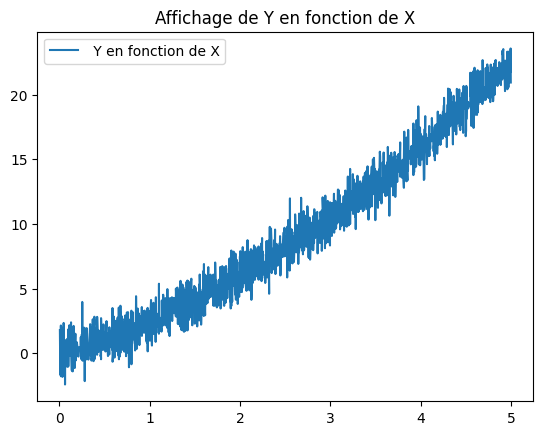

In [ ]:
X_train, X_test, y_train, y_test, epsilon_train, epsilon_test, n_train, n_test = split_data(150)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/MyDrive/DGP_functions.py', 'w') as f:
    f.write("""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import uniform, norm

# Generate the data of our experiment

def data_gen_process():
   beta1 = 2
   beta2_values = np.linspace(0, 0.16, 9)
   M = [150, 200, 500, 1000, 2000]
   n_train = 150
   n_test = 2000
   seed = 42


   epsilon = np.random.normal(0, 1, n_train + n_test)
   x = np.random.uniform(0, 5, n_train + n_test)

   x_train = x[:n_train]
   x_test = x[n_train:n_train+n_test]
   epsilon_train = epsilon[:n_train]
   epsilon_test = epsilon[n_train:n_train+n_test]

   liste_y = []
   liste_y_train = []
   liste_y_test = []

   for beta2 in beta2_values:
    y = beta1*x + beta2*x**2 + epsilon
    y_train = beta1*x_train + beta2*x_train**2 + epsilon_train
    y_test = beta1*x_test + beta2*x_test**2 + epsilon_test

    liste_y.append(y)
    liste_y_train.append(y_train)
    liste_y_test.append(y_test)

   return (beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)

# Generate one's personal data

def generate_normal_data(mean, std_dev, size):
    return np.random.normal(mean, std_dev, size)

def generate_exponential_data(scale, size):
    return np.random.exponential(scale, size)

def generate_binomial_data(n, p, size):
    return np.random.binomial(n, p, size)

def generate_uniform_data(n, p, size):
    return np.random.uniform(n, p, size)

def generate_data():
    print("Choisissez la distribution que vous souhaitez utiliser pour générer des données :")
    print("1. Normale")
    print("2. Exponentielle")
    print("3. Binomiale")
    print("4. Uniforme")

    choice = int(input("Entrez le numéro correspondant à votre choix : "))
    size = int(input("Entrez le nombre de données à générer : "))

    if choice == 1:
        mean = float(input("Entrez la moyenne : "))
        std_dev = float(input("Entrez l'écart-type : "))
        data = generate_normal_data(mean, std_dev, size)
    elif choice == 2:
        scale = float(input("Entrez le paramètre d'échelle (lambda) : "))
        data = generate_exponential_data(scale, size)
    elif choice == 3:
        n = int(input("Entrez le nombre d'essais : "))
        p = float(input("Entrez la probabilité de succès : "))
        data = generate_binomial_data(n, p, size)
    elif choice == 4:
        n = int(input("Entrez la borne gauche : "))
        p = float(input("Entrez la borne droite : "))
        data = generate_uniform_data(n, p, size)
    else:
        print("Choix invalide.")
        return None

    return data


def get_user_input():
    print("Génération des données pour X")
    x = generate_data()
    if x is None:
        return None, None, None, None
    print("Génération des données pour Epsilon")
    epsilon = generate_data()
    if epsilon is None:
        return None, None, None, None

    print("Rentrer des valeurs réelles pour les paramètres")
    expression = input("Entrez l'expression pour calculer y en fonction de x et epsilon (ex: 'beta1 * x + beta2 * x**2 + epsilon'): ")
    params = {}

    param_names = [param for param in expression.split() if param.isalpha() and param not in ['x', 'epsilon']]
    for param in param_names:
        params[param] = float(input(f"Entrez la valeur de {param}: "))

    return expression, x, epsilon, params


def calculate_y(expression, x, epsilon, **params):
    if len(x) != len(epsilon):
        raise ValueError("Les vecteurs x et epsilon doivent avoir la même taille.")

    local_vars = {'x': x, 'epsilon': epsilon}
    local_vars.update(params)

    y = eval(expression, {}, local_vars)

    return y

def your_data():
    expression, x, epsilon, params = get_user_input()
    if expression is not None and x is not None and epsilon is not None:
        y = calculate_y(expression, x, epsilon, **params)
        plt.figure()
        plt.title("Affichage de Y en fonction de X")
        plt.plot(x[np.argsort(x)], y[np.argsort(x)], label = " Y en fonction de X")
        plt.legend()
        plt.show()
    return y, x, epsilon


def split_data(n_test, random_state=None):

    y, x, epsilon = your_data()
    X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
        x, y, range(len(x)), test_size=n_test, random_state=random_state)

    epsilon_train = [epsilon[i] for i in train_indices]
    epsilon_test = [epsilon[i] for i in test_indices]

    return X_train, X_test, y_train, y_test, epsilon_train, epsilon_test, len(X_train), n_test

""")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
